<a href="https://colab.research.google.com/github/jack-1115/google-colaboratory/blob/main/gcs-operation-with-python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cloud Storageの操作

## 準備

### google-cloud-storgeライブラリのインストール

In [ ]:
# google-cloud-storgeライブラリのインストール
!pip install google-cloud-storage

### ファイルのアップロード

sample_dataフォルダと同じ階層に、
サービスアカウントキーのファイルを`service_account_kye.json'という名称で、
任意のpng画像をsample.pngという名称でそれぞれアップロードする。

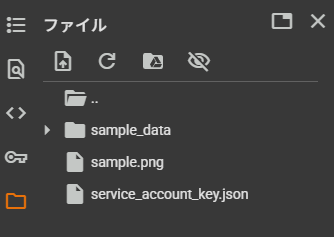

### 環境変数の設定

In [ ]:
# 環境変数の設定
import os
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = './service_account_key.json'

In [ ]:
# クライアントの作成
from google.cloud import storage
storage_client= storage.Client()

## バケット操作

In [ ]:
import datetime

timestamp = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
BUCKET_NAME = f"sample_bucket_{timestamp}"

print(BUCKET_NAME)

### バケットの作成

In [ ]:
try:
  bucket = storage_client.create_bucket(BUCKET_NAME)
except Exception as e:
  print(e)
finally:
  bucket = storage_client.get_bucket(BUCKET_NAME)
  print(f"バケット名: {bucket.name}")

### バケットの一覧を取得

In [ ]:
buckets = storage_client.list_buckets()
for bucket in buckets:
  print(f"バケット名: {bucket.name}")

### バケットの削除

In [ ]:
bucket = storage_client.get_bucket(BUCKET_NAME)

bucket.delete()

## ファイル操作

### ファイルのアップロード

In [ ]:
bucket = storage_client.create_bucket(BUCKET_NAME)

blob = bucket.blob('cloud_sample.png')
blob.upload_from_filename(filename='sample.png')

blob = bucket.blob('img/cloud_sample.png')
blob.upload_from_filename(filename='sample.png')

### ファイルのアップロード（上書きを避ける）

In [ ]:
from google.cloud.exceptions import PreconditionFailed

bucket = storage_client.get_bucket(BUCKET_NAME)
blob = bucket.blob('cloud_sample.png')

try:
  blob.upload_from_filename(filename='sample.png', if_generation_match=0)
except PreconditionFailed  as e:
  print("cloud_sample.png.pngは既に存在します。")
except Exception as e:
  print(e)

### ファイルのダウンロード

In [ ]:
bucket = storage_client.get_bucket(BUCKET_NAME)
blob = bucket.blob('cloud_sample.png')

blob.download_to_filename(filename="sample_downloaded.png")

### ファイルの一覧を取得

In [ ]:
bucket = storage_client.get_bucket(BUCKET_NAME)
blobs = bucket.list_blobs()

for blob in blobs:
  print(f"オブジェクト名: {blob.name}")

### ファイルをコピー

In [ ]:
bucket = storage_client.get_bucket(BUCKET_NAME)
blob = bucket.blob('cloud_sample.png')

bucket.copy_blob(blob, bucket, 'cloud_sample_copy.png')

blobs = bucket.list_blobs()
for blob in blobs:
  print(f"オブジェクト名: {blob.name}")

### ファイルの削除

In [ ]:
blob = bucket.blob('cloud_sample.png')
blob.delete()

blobs = bucket.list_blobs()
for blob in blobs:
  print(f"オブジェクト名: {blob.name}")

## 片付け

### バケットをオブジェクトごと削除

In [ ]:
bucket = storage_client.get_bucket(BUCKET_NAME)

bucket.delete(force=True)